In [217]:
import os
import pandas as pd
def load_csv_files(path):
    list_of_csv = []
    for dir in os.listdir(path):
        df = pd.read_csv(path + "/" + dir)
        list_of_csv.append(df)
    
    return list_of_csv


In [218]:
df_list_dash = load_csv_files("Printer3D_Data")
df_list_no_dash = load_csv_files("Printer3D_noDash")

def extract_series(df: pd.DataFrame):
    df = df.dropna()
    df_series = df["BUS"]
    return df_series

df_dash = pd.DataFrame(list(zip(extract_series(df_list_dash[0]), extract_series(df_list_dash[1]), extract_series(df_list_dash[2]))), columns=["Dash0", "Dash1", "Dash2"])
df_no_dash = pd.DataFrame(list(zip(extract_series(df_list_no_dash[0]), extract_series(df_list_no_dash[1]), extract_series(df_list_no_dash[2]))), columns=["No_Dash0", "No_Dash1", "No_Dash2"])
df_dash.head()
df_merged = pd.concat([df_no_dash, df_dash])

In [229]:
def automated_series_merging(list_dfs: list):
    series_list = []
    for df in list_dfs:
        series_list.append(extract_series(df))

    df = pd.DataFrame(series_list)
    df = df.T
    for i in range(0, (len(df.columns))):
        df.columns.values[i] = ("Dash" + str(i))
    return df

auto_df = automated_series_merging(df_list_dash)
auto_df = auto_df.dropna()
print(auto_df.shape)
print(df_dash.shape)


(107970, 3)
(107970, 3)


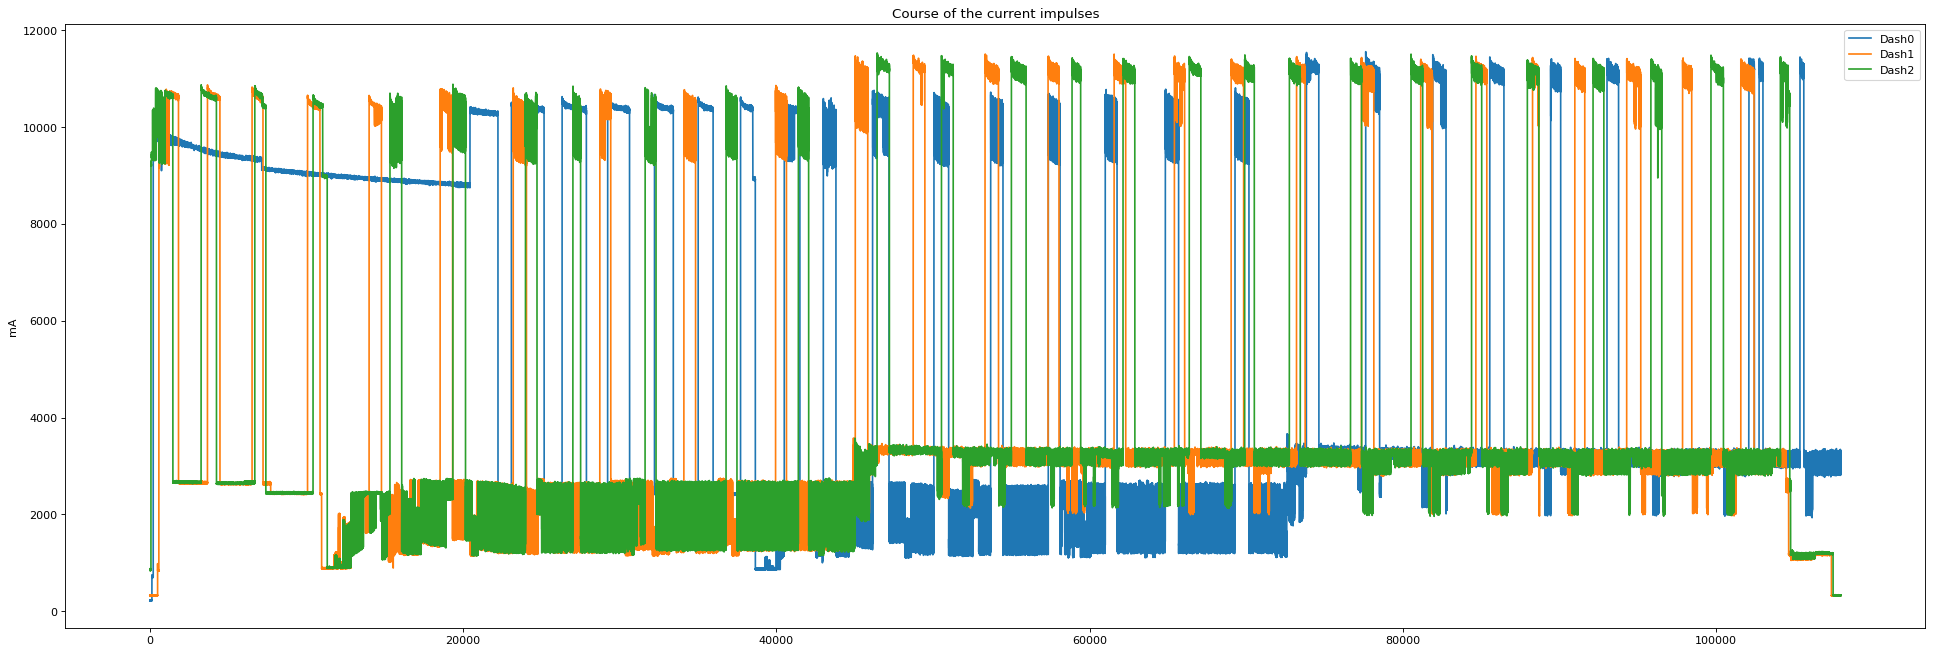

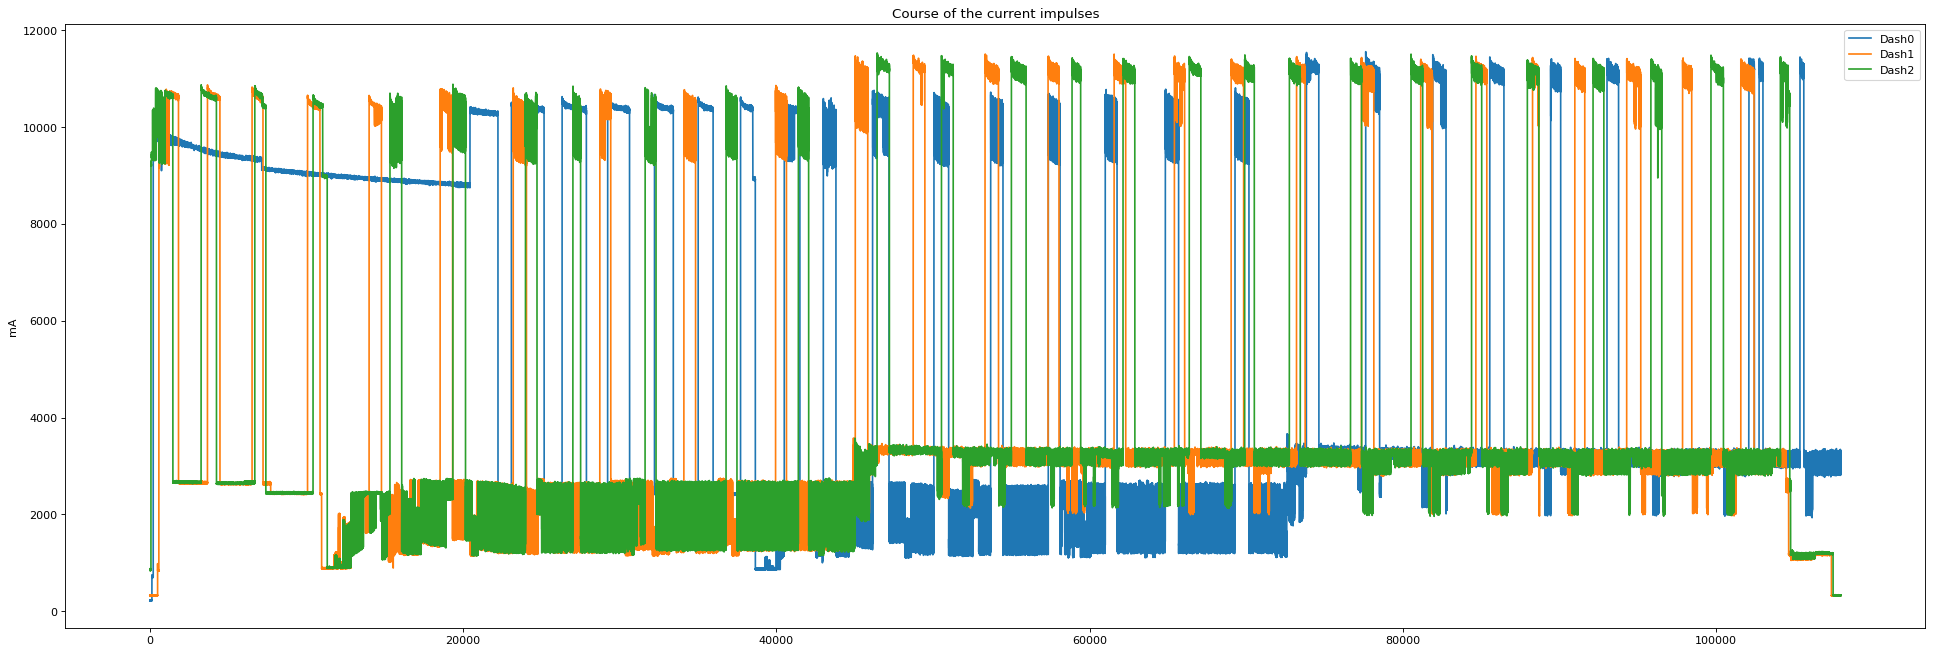

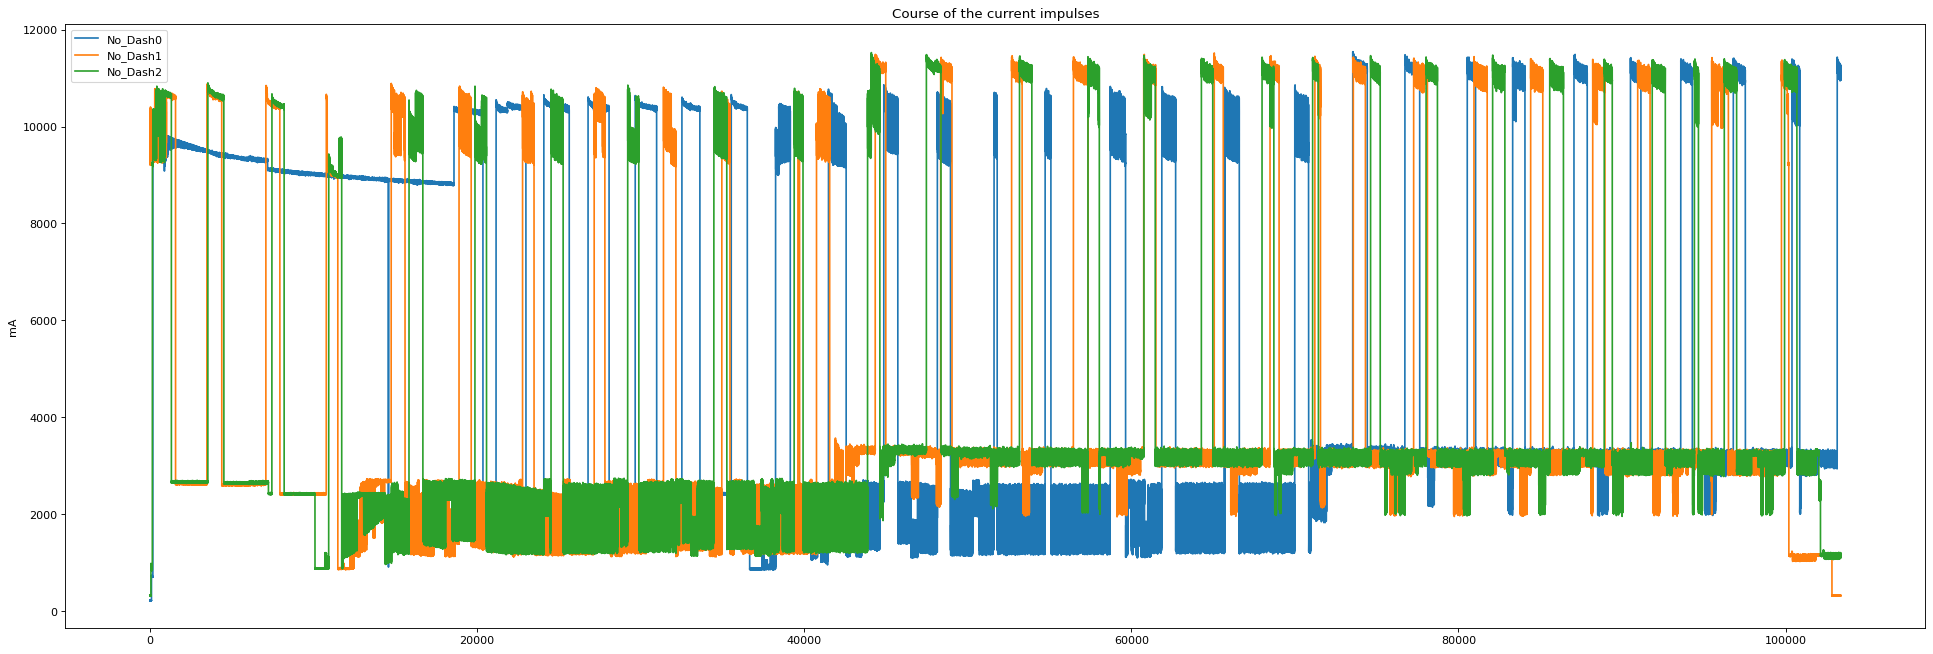

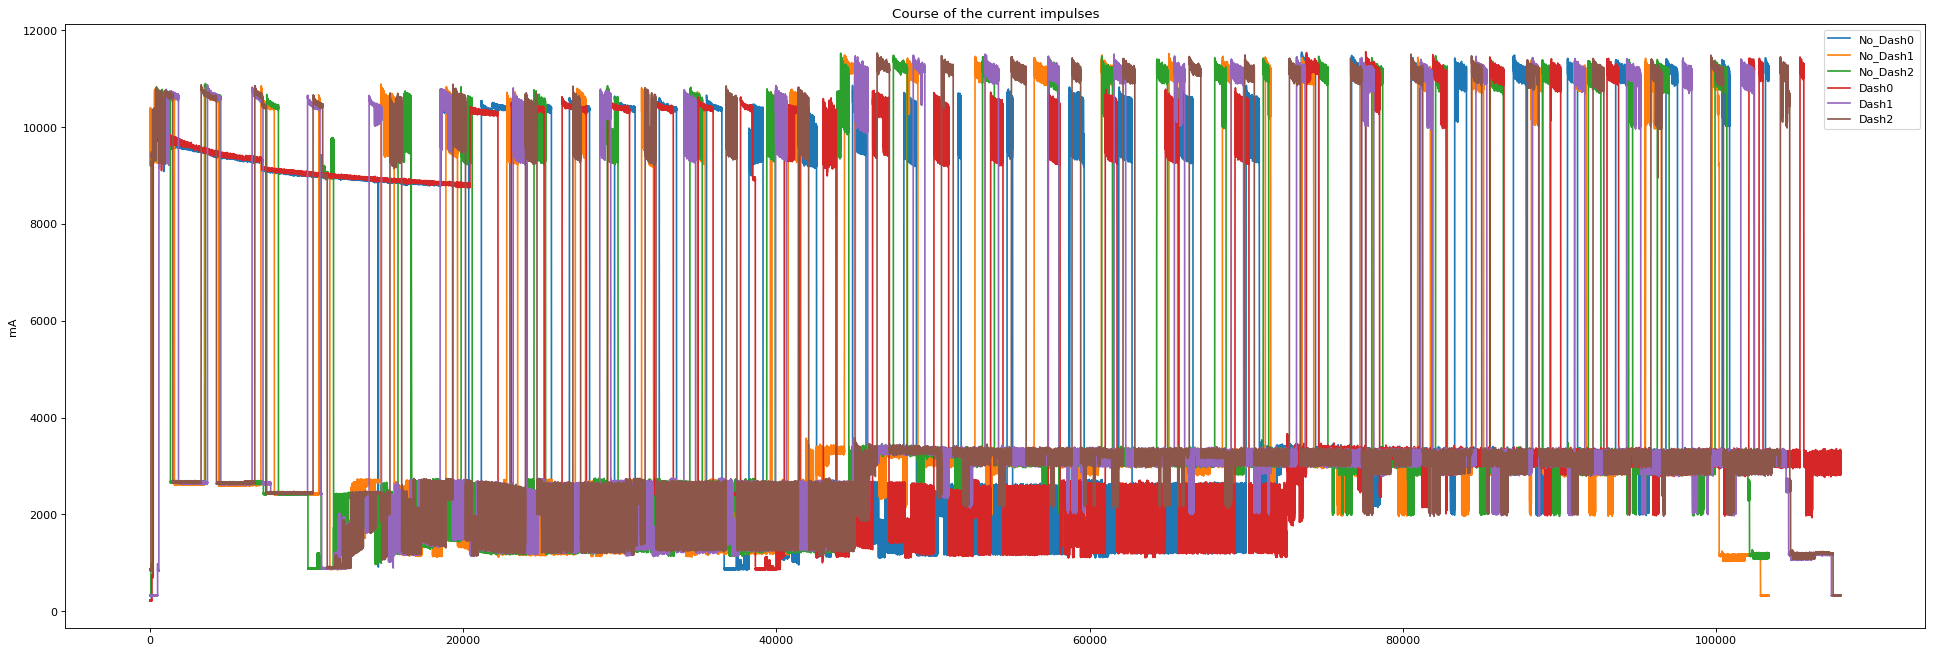

In [235]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

def create_current_pulses_plot(df: pd.DataFrame):
    length = len(df.columns)
    figure(figsize=(30, 10), dpi=80)
    # plot lines
    for column in df.columns:
        plt.plot(df[column], label = column, linestyle="-")

    plt.title("Course of the current impulses")
    plt.legend()
    plt.ylabel("mA")
    plt.show()

create_current_pulses_plot(auto_df)
create_current_pulses_plot(df_dash)
create_current_pulses_plot(df_no_dash)
create_current_pulses_plot(df_merged)



In [246]:
lst = [extract_series(df_list_dash[0]).to_list()]
lst.append(extract_series(df_list_dash[1]).to_list())

[[215.1219512195122, 219.02439024390245, 219.02439024390245, 224.8780487804878, 219.02439024390245, 220.0, 220.0, 216.09756097560972, 226.8292682926829, 217.0731707317073, 215.1219512195122, 220.97560975609755, 217.0731707317073, 225.85365853658536, 220.97560975609755, 224.8780487804878, 220.0, 220.0, 220.97560975609755, 227.8048780487805, 219.02439024390245, 218.0487804878049, 221.95121951219517, 220.0, 220.97560975609755, 223.90243902439025, 221.95121951219517, 218.0487804878049, 214.14634146341464, 220.0, 220.97560975609755, 215.1219512195122, 223.90243902439025, 222.9268292682927, 219.02439024390245, 225.85365853658536, 223.90243902439025, 216.09756097560972, 219.02439024390245, 224.8780487804878, 216.09756097560972, 220.0, 220.0, 217.0731707317073, 217.0731707317073, 216.09756097560972, 220.97560975609755, 223.90243902439025, 218.0487804878049, 227.8048780487805, 220.0, 223.90243902439025, 221.95121951219517, 222.9268292682927, 216.09756097560972, 227.8048780487805, 221.9512195121